# Convolutional Neural Network to Recognise Digits

## About The Project

Deep Learning was performed by creating a Convolutional Neural Network (CNN) using TensorFlow to identify handwritten digits on images. This was achieved by preparing the data and then performing CNN modelling and evaluation. An accuracy of 98.8% was achieved when the predictions were submitted to Kaggle. 

## Setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


%matplotlib inline

Using TensorFlow backend.


## Load Data

In [2]:
data = pd.read_csv("train.csv")
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
print(data.shape)

(42000, 785)


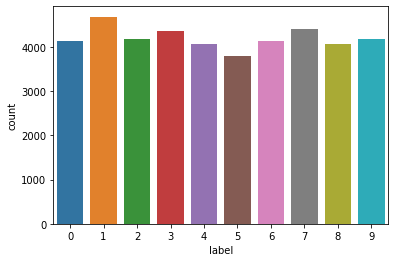

In [4]:
sns.countplot(data.label)

There is roughly similar number of samples for the 10 digits. 

In [5]:
print(data.isnull().any().describe())

count       785
unique        1
top       False
freq        785
dtype: object


There are no null values in the data. 

## Modelling

Split the provided data into train and validation images. 

In [6]:
train, val = train_test_split(data, random_state=0)


In [7]:
print(train.shape)

(31500, 785)


In [8]:
print(val.shape)

(10500, 785)


In [9]:
X_train = train.drop('label', axis=1)
X_val = val.drop('label', axis=1)
y_train = train.label
y_val = val.label

Normalise the data:

In [10]:
X_train = X_train/255.0
X_val = X_val/255.0

Reshape the data to form images of size 28px by 28px.

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)
print(X_train.shape)

(31500, 28, 28, 1)


In [12]:
X_val = X_val.values.reshape(-1,28,28,1)
print(X_val.shape)

(10500, 28, 28, 1)


In [13]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [14]:
X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

A Convolutional Neural Network (CNN) is structured to reduce the images into a form which is easier to process while retaining important features to obtain good prediction: 
- Convolutional layer (Conv2D) can isolate useful features from the images
- Pooling layer (MaxPooling2D) helps with dimensionality reduction, facilitating the extraction of dominant features. 
- Dropout layer is for regularization to reduce overfitting
- Flatten layer converts the feature maps into a single 1D vector

In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=1)])

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 40s 1ms/sample - loss: 0.3563 - accuracy: 0.8858 - val_loss: 0.0907 - val_accuracy: 0.9725
Epoch 2/5
31500/31500 [==============================] - 38s 1ms/sample - loss: 0.1319 - accuracy: 0.9592 - val_loss: 0.0642 - val_accuracy: 0.9801
Epoch 3/5
31500/31500 [==============================] - 38s 1ms/sample - loss: 0.1003 - accuracy: 0.9699 - val_loss: 0.0484 - val_accuracy: 0.9850
Epoch 4/5
31500/31500 [==============================] - 36s 1ms/sample - loss: 0.0840 - accuracy: 0.9740 - val_loss: 0.0475 - val_accuracy: 0.9849
Epoch 5/5
31500/31500 [==============================] - 33s 1ms/sample - loss: 0.0704 - accuracy: 0.9771 - val_loss: 0.0412 - val_accuracy: 0.9871


## Prediction

In [19]:
test = pd.read_csv(os.path.join(filepath,"test.csv"))

In [25]:
test = test/255.0

In [27]:
test = test.values.reshape(-1, 28, 28, 1)

In [31]:
prediction = model.predict_classes(test)

In [35]:
submission = pd.DataFrame({
    'ImageId': pd.Series(range(1,28001)),
    'Label': prediction
})
submission.to_csv('submission.csv', index=False)

In [36]:
model.save("model.h5")

The predictions from the above model were submitted to Kaggle and achieved 98.8% accuracy. 